# Manufacturing drift detection

In [14]:
import pandas as pd
import numpy as np, matplotlib.pyplot as plt

In [27]:
machine_golden = pd.DataFrame(np.random.normal(size=(200,10)))
machine_golden

,0,1,2,3,4,5,6,7,8,9
0,-0.327874,-0.725406,1.312025,-0.859632,-2.111767,1.085949,-1.131929,0.926824,-2.053235,-0.186329
1,-0.089723,-0.909977,-0.118256,1.766515,0.846353,-0.315587,-0.217472,1.128551,-1.123301,0.200311
2,1.163623,1.979236,-2.452030,1.713043,-1.502508,1.181702,-0.692683,-0.599346,0.815864,0.220264
3,0.735665,0.956756,0.605577,-0.632014,1.356095,1.241578,-0.242838,-0.427131,-0.777108,1.787468
4,-0.415992,-1.030178,-1.130813,0.129637,-0.357569,1.303465,-0.189021,0.873845,0.629426,-0.270657
...,...,...,...,...,...,...,...,...,...,...
195,0.747081,-0.240956,-1.027148,-0.980041,0.750100,-0.833705,-0.708009,-0.487029,0.782924,0.062013
196,1.895218,1.639168,2.305735,-0.394012,-0.783290,0.366254,-0.824884,0.155647,1.620161,1.478857
197,0.962077,-0.166497,0.329428,-0.819233,0.041855,0.771031,0.550102,1.112877,0.454608,-0.586498
198,0.622943,-1.273979,0.510586,1.373333,0.294862,0.913177,-0.660015,-0.832583,-1.871327,1.244299


In [33]:
machines = {'machine'+str(i):[] for i in range(1,11)}
for i in range(1,11):
    loc = np.random.uniform(0,2)
    scale = np.random.uniform(0,2)
    df1 = machine_golden+pd.DataFrame(np.random.normal(loc=loc,scale=scale,size=(200,10)))
    machines['machine'+str(i)] = df1
machines

{'machine1':             0         1         2         3         4         5         6  \
 0    1.754354  0.667790  2.721723  0.701842 -0.169080  2.796775  0.386945   
 1    1.651810  0.721563  1.811730  3.257927  2.113071  1.409393  1.496102   
 2    2.984089  3.265431 -0.761629  3.484351  0.290674  2.838289  1.170936   
 3    2.673772  2.651313  2.063403  0.884089  2.934672  3.076415  1.743398   
 4    1.000693  1.093265  0.446644  1.485318  1.298420  2.317960  1.302554   
 ..        ...       ...       ...       ...       ...       ...       ...   
 195  2.045386  1.772368  0.368572  0.970664  2.600360  1.095947  0.609336   
 196  3.672458  3.106240  3.532171  1.682457  0.783631  1.670860  0.280240   
 197  2.452973  1.700501  1.894701  0.784666  1.487781  1.944660  2.262212   
 198  2.686643  0.634970  2.333212  2.455740  2.092712  2.430339  1.089003   
 199  2.884820  3.770230  1.028066  2.353158  2.869029  2.053633  2.664731   
 
             7         8         9  
 0    2.11148

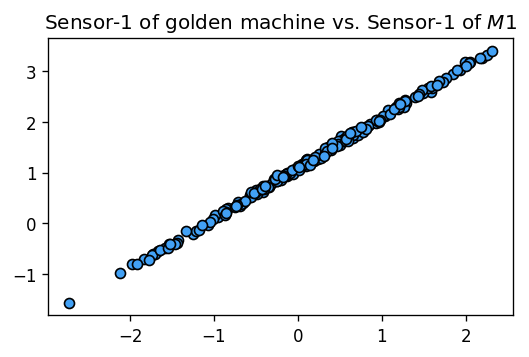

In [31]:
plt.figure(figsize=(5,3),dpi=120)
plt.scatter(machine_golden.loc[:,0],machines['machine1'].loc[:,0], 
            edgecolor='k', color='#42a1f5')
plt.title("Sensor-1 of golden machine vs. Sensor-1 of $M$1")
plt.show()

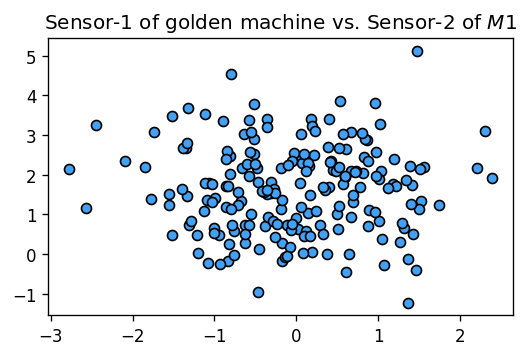

In [37]:
plt.figure(figsize=(5,3),dpi=120)
plt.scatter(machine_golden.loc[:,2],machines['machine1'].loc[:,1],
           edgecolor='k', color='#42a1f5')
plt.title("Sensor-1 of golden machine vs. Sensor-2 of $M$1")
plt.show()

In [43]:
machine_golden.corrwith(machines['machine1'],axis=1)

0      0.975183
1      0.982572
2      0.990407
3      0.980973
4      0.906746
         ...   
195    0.906826
196    0.962757
197    0.927738
198    0.967984
199    0.968219
Length: 200, dtype: float64

In [47]:
for machine in machines:
    print(f"Correlation of {machine} with the golden tester:", round(machine_golden.corrwith(machines[machine],axis=1).sum(),2))

Correlation of machine1 with the golden tester: 193.29
Correlation of machine2 with the golden tester: 192.0
Correlation of machine3 with the golden tester: 145.96
Correlation of machine4 with the golden tester: 124.32
Correlation of machine5 with the golden tester: 119.66
Correlation of machine6 with the golden tester: 132.05
Correlation of machine7 with the golden tester: 133.15
Correlation of machine8 with the golden tester: 150.7
Correlation of machine9 with the golden tester: 96.96
Correlation of machine10 with the golden tester: 83.77


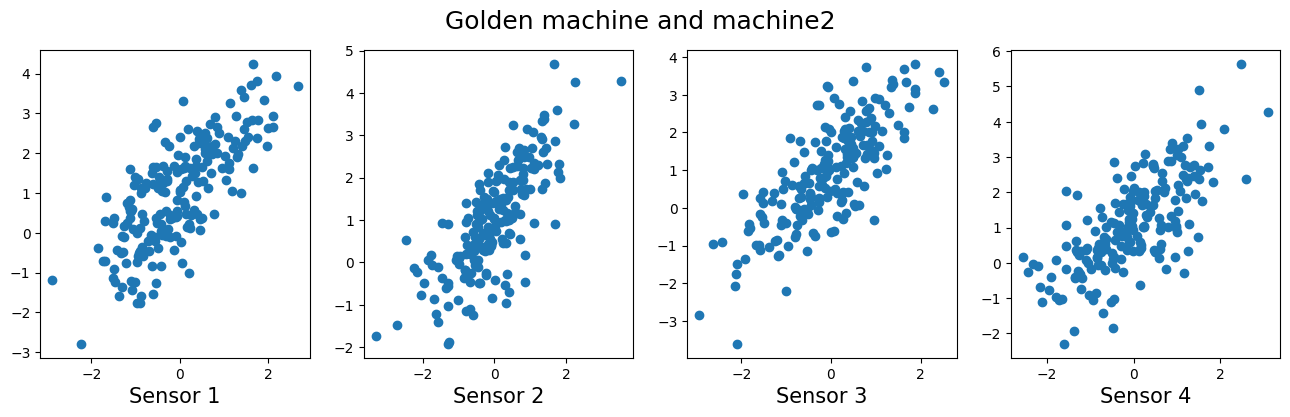

In [20]:
fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Golden machine and machine2", fontsize=18,va='top')
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(machine_golden.loc[:,i],machines['machine2'].loc[:,i])
    ax[i].set_xlabel(f"Sensor {i+1}",fontsize=15)
plt.show()

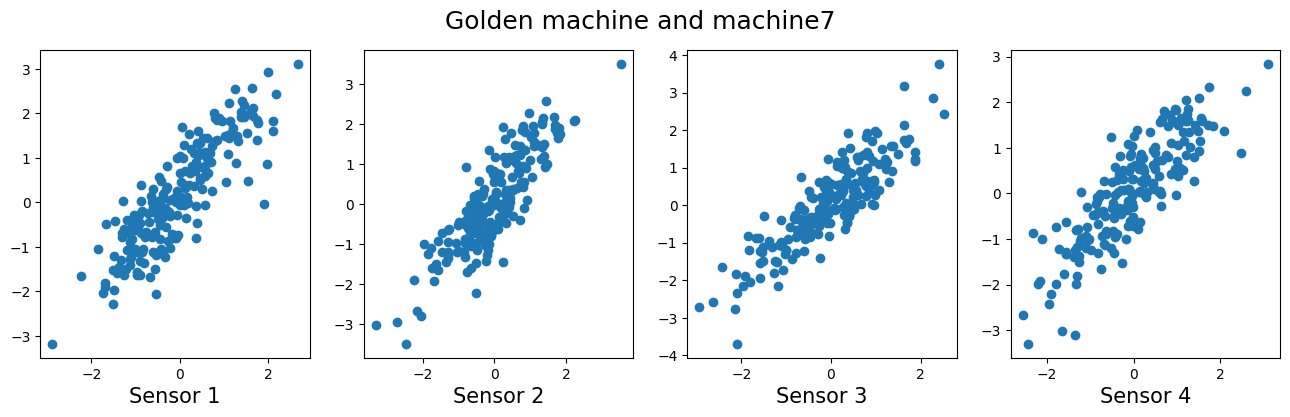

In [21]:
fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Golden machine and machine7", fontsize=18)
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(machine_golden.loc[:,i],machines['machine7'].loc[:,i])
    ax[i].set_xlabel(f"Sensor {i+1}",fontsize=15)
plt.show()

In [22]:
import seaborn as sns

<Figure size 768x576 with 0 Axes>

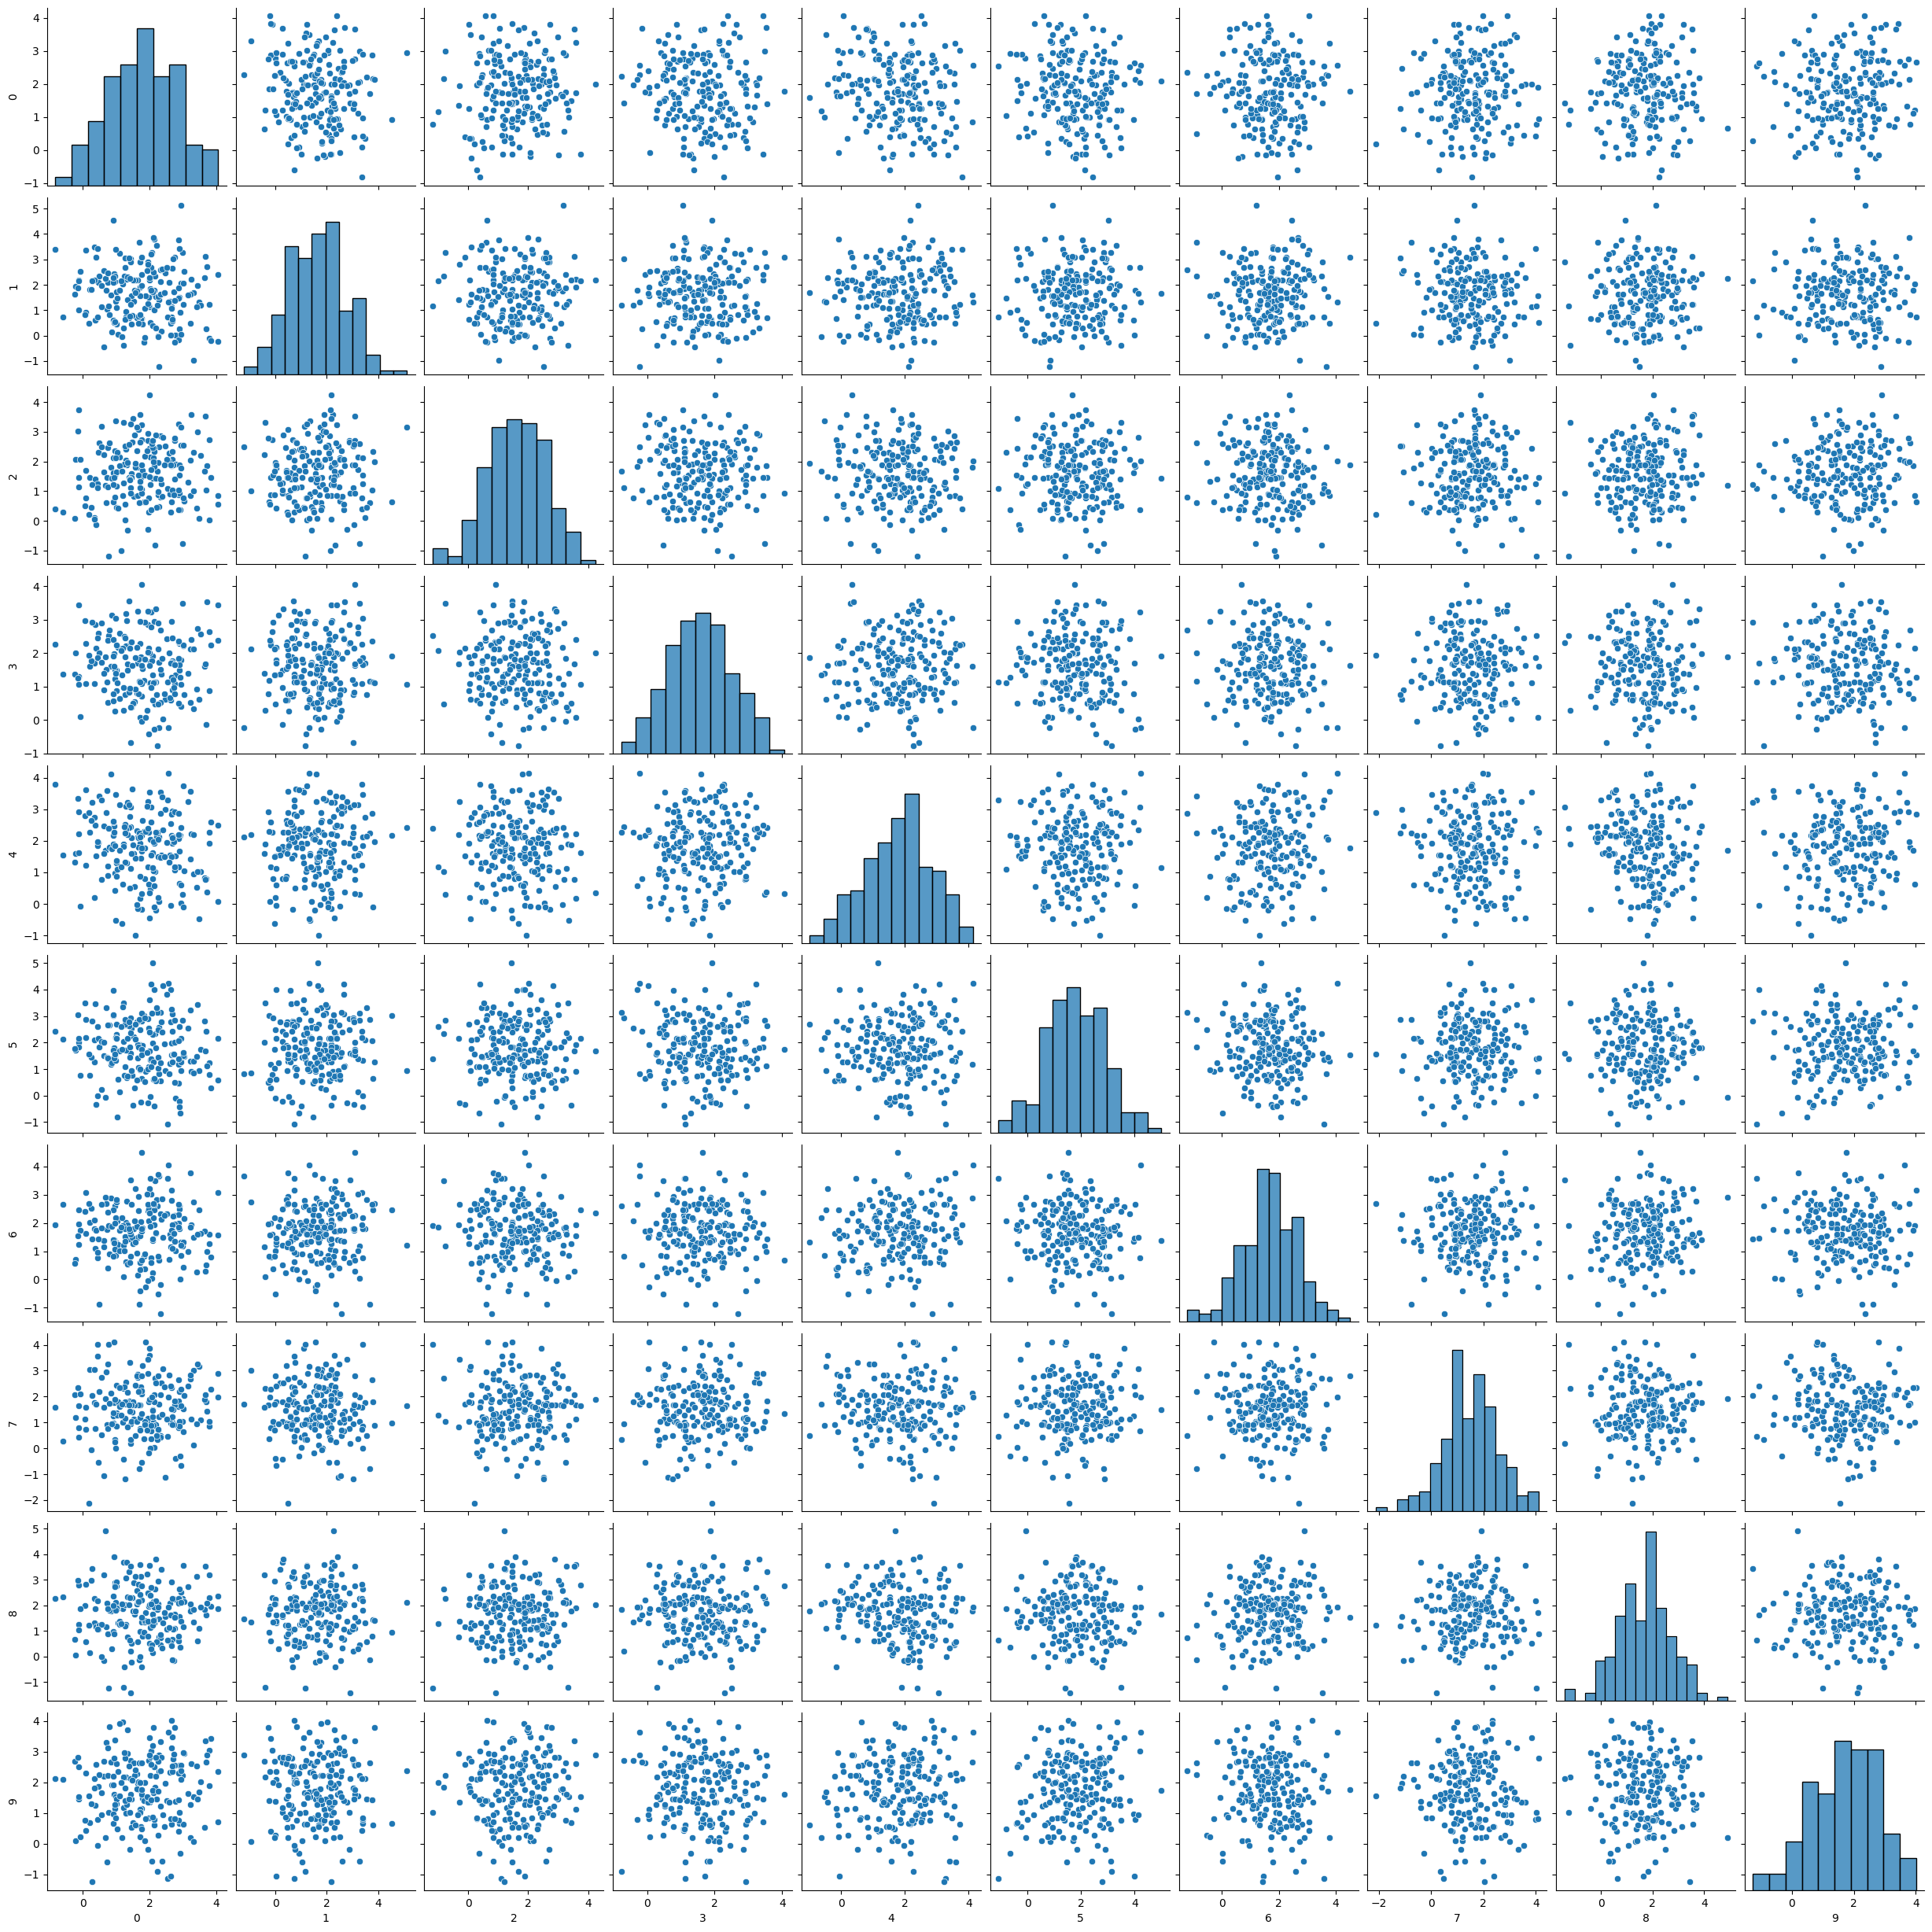

In [49]:
plt.figure(dpi=120)
sns.pairplot(data=machines['machine1'])
plt.show()

In [24]:
corr_score = {'machine'+str(i):[] for i in range(1,11)}
for machine in machines:
    score = round(machine_golden.corrwith(machines[machine],axis=1).sum(),2)
    corr_score[machine] = score

In [25]:
def color_vals(x):
    if x > 100:
        return '#42a1f5'
    else:
        return 'red'

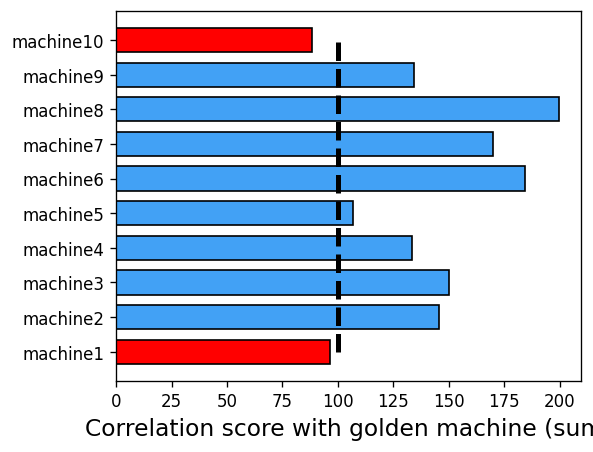

In [26]:
plt.figure(figsize=(5,4),dpi=120)
plt.barh(y=list(corr_score.keys()),width = corr_score.values(), 
         color=list(map(color_vals,list(corr_score.values()))), edgecolor='k',height=0.7)
plt.vlines(x=100,ymin='machine1',ymax='machine10',
           linewidth=3,color='k',linestyle='--')
plt.xlabel("Correlation score with golden machine (sum)",fontsize=14)
plt.show()